Predicted: 99.97532801828658
Actual: 100.0


**GENERATING GRAPH**

1 - Blue dot is for actual peak
2 - Red dot is for predicted peak


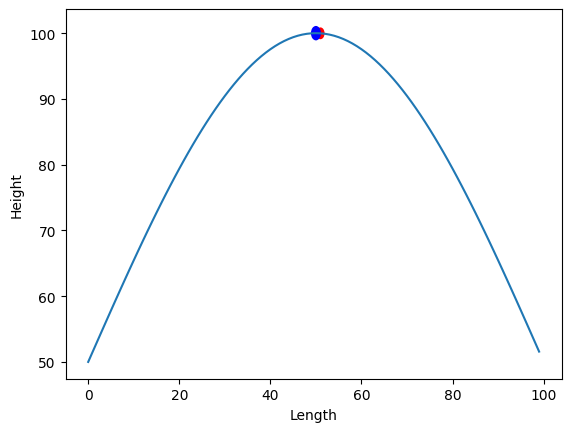

'\n---------------------------\n||Please run the program ||\n||multiple times to find ||\n||the approximate value  ||\n||each time it is run    ||\n---------------------------\n'

In [47]:
import math
import random
import numpy as np

#initially, we need a list with numbers to represent a mountain-like shape
num_points = 100
h = [50 * math.sin(math.pi * x / num_points) + 50 for x in range(num_points)]


#We define the simulated annealing function like so:
def optimise(map):

  #We start with a random index, as simulated annealing calls for. 
  idx = random.randrange(0,100)
  for i in range(300):

    #we use an expression to calculate the temperature (I got this temperature formula online from the University of Helsinki's Elements of AI course.)
    T = 2*max(0, ((100-i*1.2)/100))**3

    #we then select another "new" random value to compare with.
    new = random.randrange(0,100)

    #if the new location is larger, we move to that location.
    if map[new] > map[idx]:
      idx = new
    else:

      #if the temperature is zero, the optimisation is done.
      if T == 0:
        break

      #if the location is lower, and within a certain probability (simulated annealing)
      #of being accepted, we will accept that as our new location.
      if math.exp(new - idx/T) > 0.3: # this part controls the actual simulated annealing part. e^(n-o/T)
        idx = new;
      else:
        continue

    if T == 0:
      break;

  print(f"Predicted: {h[idx]}")
  print("Actual:", max(h))

  print("\n\n**GENERATING GRAPH**\n\n1 - Blue dot is for actual peak\n2 - Red dot is for predicted peak")

#We create a graph, shaped like a mountain, to find out if the algorithm has reasonably identified the peak.
  import matplotlib.pyplot as plt
  from matplotlib.patches import Circle

  fig, ax = plt.subplots()
  ax.plot(range(0,100), h)
  ax.set_xlabel('Length')
  ax.set_ylabel('Height')

  # Add a circle at x=50, y=50 with radius=10
  circle = Circle((idx, h[idx]), 0.9, facecolor='red')
  ax.add_patch(circle)
  circle1 = Circle((h.index(max(h)), max(h)), 1.1, facecolor='blue')
  ax.add_patch(circle1)

  plt.show()

optimise(h)

'''
---------------------------
||Please run the program ||
||multiple times to find ||
||the approximate value  ||
||each time it is run    ||
---------------------------
'''